In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from ast import literal_eval
import ast


from PIL import Image

import seaborn as sns

In [2]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\movies_metadata.csv')
df.head(1)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                               homepage   id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  862  tt0114709                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   

  release_date      revenue runtime                          spoken_languages  \
0   1995-10-30  373554033.0    81.0  [{'iso_639_1': 'en', 'name': 'English'}]   

     status  tagline      title  video vote_average vote_count  
0  Released      NaN  Toy Story  False          7.7     5415.0  

[1 rows x 24 columns]

In [3]:
df.tail()

adult belongs_to_collection budget  \
45461  False                   NaN      0   
45462  False                   NaN      0   
45463  False                   NaN      0   
45464  False                   NaN      0   
45465  False                   NaN      0   

                                                  genres  \
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language       original_title  \
45461                fa              رگ خواب   
45462                tl  Siglo ng Pagluluwal   
45463                en             Betrayal   
45464                en  Satana likuyushchiy   
45465                en             Queerama   

                                                overview  ... release_date  \
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisation of homosexual...  ...   2017-06-09   

      revenue runtime                          spoken_languages    status  \
45461     0.0    90.0    [{'iso_639_1': 'fa', 'name': 'فارسی'}]  Released   
45462     0.0   360.0         [{'iso_639_1': 'tl', 'name': ''}]  Released   
45463     0.0    90.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
45464     0.0    87.0                                        []  Released   
45465     0.0    75.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                          tagline                title  video  \
45461  Rising and falling between a man and woman               Subdue  False   
45462                                         NaN  Century of Birthing  False   
45463                      A deadly game of wits.             Betrayal  False   
45464                                         NaN     Satan Triumphant  False   
45465                                         NaN             Queerama  False   

      vote_average vote_count  
45461          4.0        1.0  
45462          9.0        3.0  
45463          3.8        6.0  
45464          0.0        0.0  
45465          0.0        0.0  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [5]:
df.isnull().any()

adult                    False
belongs_to_collection     True
budget                   False
genres                   False
homepage                  True
id                       False
imdb_id                   True
original_language         True
original_title           False
overview                  True
popularity                True
poster_path               True
production_companies      True
production_countries      True
release_date              True
revenue                   True
runtime                   True
spoken_languages          True
status                    True
tagline                   True
title                     True
video                     True
vote_average              True
vote_count                True
dtype: bool

In [6]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Budget

In [7]:
df2 = df[['id', 'budget', 'revenue']]

In [8]:
df2.budget.value_counts()

0            36573
5000000        286
10000000       259
20000000       243
2000000        242
             ...  
209000000        1
11715578         1
9                1
7347125          1
2480421          1
Name: budget, Length: 1226, dtype: int64

In [9]:
df2.revenue.value_counts()

0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
               ...  
245724603.0        1
12212123.0         1
8203235.0          1
25900.0            1
12032983.0         1
Name: revenue, Length: 6863, dtype: int64

In [10]:
df[pd.to_numeric(df['budget'],errors='coerce').isnull()]['budget']

19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object

In [11]:
a = df.iloc[29503, 1:4]
b = df.iloc[19730 , 1:4]
c = df.iloc[35587 , 1:4]

a, b, c

(belongs_to_collection                                             1.931659
 budget                                    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
 genres                   [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...
 Name: 29503, dtype: object,
 belongs_to_collection                                             0.065736
 budget                                    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
 genres                   [{'name': 'Carousel Productions', 'id': 11176}...
 Name: 19730, dtype: object,
 belongs_to_collection                                             2.185485
 budget                                    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
 genres                   [{'name': 'Odyssey Media', 'id': 17161}, {'nam...
 Name: 35587, dtype: object)

In [12]:
df2 = df2.drop(19730)
df2 = df2.drop(29503) 
df2 = df2.drop(35587)
print ("j.peg columns dropped")

j.peg columns dropped


In [13]:
df2.head()

id    budget      revenue
0    862  30000000  373554033.0
1   8844  65000000  262797249.0
2  15602         0          0.0
3  31357  16000000   81452156.0
4  11862         0   76578911.0

In [14]:
 df2.budget.dtype

dtype('O')

In [15]:
df2.budget = pd.to_numeric(df2.budget, errors='coerce')
# df2 = df2.dropna()
df2.budget.dtype

dtype('int64')

In [16]:
df2['budget'] = df2['budget'].replace(0, np.nan)
df2['revenue'] = df2['revenue'].replace(0, np.nan)

df2

id      budget      revenue
0         862  30000000.0  373554033.0
1        8844  65000000.0  262797249.0
2       15602         NaN          NaN
3       31357  16000000.0   81452156.0
4       11862         NaN   76578911.0
...       ...         ...          ...
45461  439050         NaN          NaN
45462  111109         NaN          NaN
45463   67758         NaN          NaN
45464  227506         NaN          NaN
45465  461257         NaN          NaN

[45463 rows x 3 columns]

In [17]:
df2['money_earned'] = df['revenue'] - df2['budget']
df2 = df2.dropna()

df2

id      budget      revenue  money_earned
0         862  30000000.0  373554033.0   343554033.0
1        8844  65000000.0  262797249.0   197797249.0
3       31357  16000000.0   81452156.0    65452156.0
5         949  60000000.0  187436818.0   127436818.0
8        9091  35000000.0   64350171.0    29350171.0
...       ...         ...          ...           ...
45250   24049  12000000.0   19000000.0     7000000.0
45399  280422    750000.0          3.0     -749997.0
45409   62757    800000.0    1328612.0      528612.0
45412   63281   2000000.0    1268793.0     -731207.0
45422   63898   5000000.0    1413000.0    -3587000.0

[5381 rows x 4 columns]

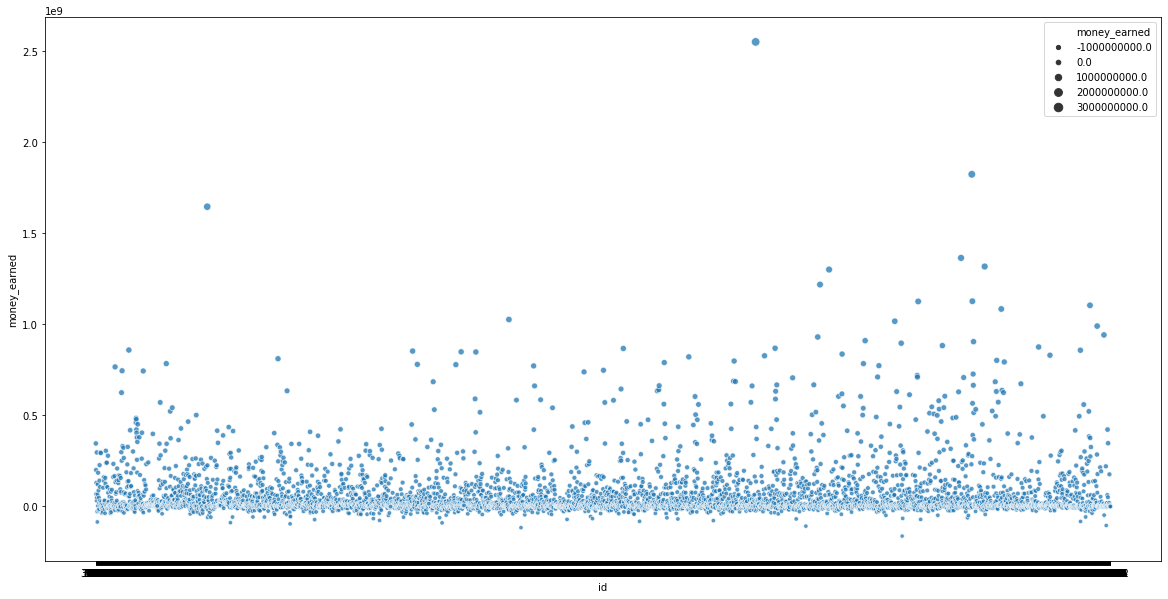

In [18]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x="id", y="money_earned", data=df2, alpha = 0.75, size = 'money_earned')

Popularity

In [19]:
df.popularity.dtype

dtype('O')

In [20]:
popularity_df = df[['id', 'popularity']]
# popularity_df = popularity_df.set_index('id')
popularity_df.head(1)

id popularity
0  862    21.9469

In [21]:
prob_rows = popularity_df[pd.to_numeric(popularity_df['popularity'],errors='raise').isnull()]['popularity']
prob_rows

ValueError: Unable to parse string "Beware Of Frost Bites" at position 35587

In [22]:
popularity_df = popularity_df.dropna()

In [23]:
popularity_df = popularity_df.drop(35587)

In [24]:
popularity_df.isnull().any(), popularity_df.popularity.dtype


(id            False
 popularity    False
 dtype: bool, dtype('O'))

In [25]:
popularity_df['popularity'] = pd.to_numeric(popularity_df['popularity'], errors='coerce')
popularity_df['popularity'].dtype

dtype('float64')

In [26]:
data = popularity_df.popularity.describe()
data

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

##Genres##

In [27]:
genres = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [28]:
genres.value_counts()

[Drama]                                                                           5000
[Comedy]                                                                          3621
[Documentary]                                                                     2723
[]                                                                                2442
[Drama, Romance]                                                                  1301
                                                                                  ... 
[Drama, Thriller, Documentary]                                                       1
[Crime, Action, Horror, Thriller]                                                    1
[Action, Comedy, Thriller, Documentary]                                              1
[Drama, Horror, Family]                                                              1
[Fantasy, Animation, Drama, Science Fiction, Romance, Foreign, Family, Comedy]       1
Name: genres, Length: 4069, dtype: int64

In [29]:
def f_genre_counter (df):
    """
                    --What it does--
    Counts the number of different genres located in the df. Then returns them in dictionary format.

                    --What it needs--
    A dataframe with embeded lists within the cells.

    """
    family = 0
    comedy = 0
    adventure = 0
    action = 0
    drama = 0
    science_fiction = 0
    fantasy = 0
    romance = 0
    animation = 0
    thriller = 0
    documentary = 0
    foreign = 0

    for e in df:
        for i in e:
            if i == "Family" or i == "family":
               family += 1
            elif i == "Comedy" or i == "comedy":
                comedy += 1
            elif i == "Adventure" or i == "adventure":
                adventure += 1
            elif i == "Action" or i == "action":
                action += 1
            elif i == "Drama" or i == "drama":
                drama += 1
            elif i == "Science fiction" or i == "Science Fiction":
                science_fiction += 1
            elif i == "Fantasy" or i == "fantasy":
                fantasy += 1
            elif i == "Romance" or i == "romance":
                romance += 1
            elif i == "Animation" or i == "animation":
                animation += 1
            elif i == "Thriller" or i == "thriller":
                thriller += 1
            elif i == "Documentary" or i == "documentary":
                documentary += 1
            elif i == "Foreign" or i == "foreign":
                foreign += 1
            else:
                pass

    genres_count = {'Genres': ['Family', 'Comedy', 'Adventure', 'Action','Drama', 'Science Fiction', 'Fantasy', 'Romance', 'Animation', 'Thriller', 'Documentary', 'Foreign'], 'Counts': [family, comedy, adventure, action, drama, science_fiction, fantasy, romance, animation, thriller, documentary, foreign]}

    return genres_count

genres_count = f_genre_counter(genres)
genres_count = pd.DataFrame.from_dict(genres_count)
genres_count

Genres  Counts
0            Family    2770
1            Comedy   13182
2         Adventure    3496
3            Action    6596
4             Drama   20265
5   Science Fiction    3049
6           Fantasy    2313
7           Romance    6735
8         Animation    1935
9          Thriller    7624
10      Documentary    3932
11          Foreign    1622

In [30]:
genres_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
Genres    12 non-null object
Counts    12 non-null int64
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [31]:
genres_count = genres_count.sort_values(by= 'Counts', ascending=False)
genres_count = genres_count.reset_index(drop= True)
genres_count

Genres  Counts
0             Drama   20265
1            Comedy   13182
2          Thriller    7624
3           Romance    6735
4            Action    6596
5       Documentary    3932
6         Adventure    3496
7   Science Fiction    3049
8            Family    2770
9           Fantasy    2313
10        Animation    1935
11          Foreign    1622

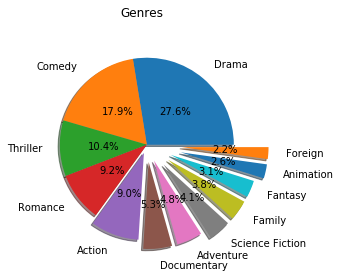

In [32]:
labels = 'Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Documentary', 'Adventure', 'Science Fiction', 'Family', 'Fantasy', 'Animation', 'Foreign'
explode = (0, 0, 0, 0, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4, 0.4)
plt.pie(genres_count.Counts,  autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Genres', fontsize=12)

plt.show();

##Production countries##

In [33]:
df.production_countries

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [34]:
countries = df [['id', 'production_countries', 'original_language']]
countries['production_countries'] = countries['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
countries = pd.DataFrame(countries.dropna())

countries.head()

id        production_countries original_language
0    862  [United States of America]                en
1   8844  [United States of America]                en
2  15602  [United States of America]                en
3  31357  [United States of America]                en
4  11862  [United States of America]                en

In [49]:
productions = countries['production_countries'].value_counts().head(11)
productions

[United States of America]                    17848
[]                                             6286
[United Kingdom]                               2238
[France]                                       1652
[Japan]                                        1356
[Italy]                                        1030
[Canada]                                        840
[Germany]                                       749
[India]                                         735
[Russia]                                        735
[United Kingdom, United States of America]      569
Name: production_countries, dtype: int64

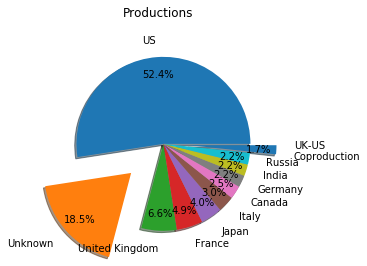

In [57]:
labels = 'US', 'Unknown', 'United Kingdom', 'France', 'Japan', 'Italy', 'Canada', 'Germany', 'India', 'Russia', 'UK-US\nCoproduction'
explode = 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0.3
plt.pie(productions, autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 0.8, labeldistance = 1.2)
plt.suptitle('Productions', fontsize=12)

plt.show();

In [ ]:
# While 1/5th of the data is non-readable (no value is assigned to it), it is has become quite clear the predominance and importance of the american film industry. Indeed if we take a quick look at the pie, we can see how even accounting for the missing data, no other country comes even close to the US in this matter.

In [35]:
languages = pd.DataFrame(countries['original_language'].value_counts())
languages_10 = languages.head(10)
languages_10

original_language
en              32269
fr               2438
it               1529
ja               1350
de               1080
es                994
ru                826
hi                508
ko                444
zh                409

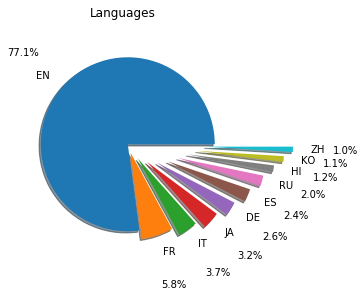

In [36]:
explode = (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
labels = 'EN', 'FR', 'IT', 'JA', 'DE', 'ES', 'RU', 'HI', 'KO', 'ZH'
plt.pie(languages_10,  autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 1.6, labeldistance = 1.2)
plt.suptitle('Languages', fontsize=12)

plt.show();


In [ ]:
# As the language chart corroborates, the english speaking market is by far the most numerous. Also some of the position for the countries/languages has shifted a bit (most notably the smaller film industries), and the spanish speaking market makes a sudden appearance ahead of the russian or hindu markets

###Profitability by country###

For the following procedure, it is necessary to merge both the profit df (df2) and the country df (countries). The key essential to both will be "id"

In [59]:
prof_coun = pd.merge(df2, countries, on='id', how='inner')
prof_coun.head()

id      budget      revenue  money_earned        production_countries  \
0    862  30000000.0  373554033.0   343554033.0  [United States of America]   
1   8844  65000000.0  262797249.0   197797249.0  [United States of America]   
2  31357  16000000.0   81452156.0    65452156.0  [United States of America]   
3    949  60000000.0  187436818.0   127436818.0  [United States of America]   
4   9091  35000000.0   64350171.0    29350171.0  [United States of America]   

  original_language  
0                en  
1                en  
2                en  
3                en  
4                en

In [70]:
prof_coun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5393 entries, 0 to 5392
Data columns (total 6 columns):
id                      5393 non-null object
budget                  5393 non-null float64
revenue                 5393 non-null float64
money_earned            5393 non-null float64
production_countries    5393 non-null object
original_language       5393 non-null object
dtypes: float64(3), object(3)
memory usage: 454.9+ KB
